# Семинар 3: линейная регрессия, обучение и валидация модели.

### Одномерная линейная регрессия

1. Выведите формулу обновления весов одномерной линейной регрессии методом градиентного спуска.

2. Напишите функцию, релизующую обучение одномерной линейной регрессии методом градиентного спуска.

In [1]:
def linear_regression(X, y_true, m = 0, b = 0, epochs = 1000, learning_rate = 0.0001):
    N = float(len(y_true))
    for i in range(epochs):
        y_pred = m * X + b
        cost = sum([err**2 for err in (y_pred - y_true)])*(1./N)
        m_gradient = (2./N)*sum(X*(y_pred-y_true))
        b_gradient = (2./N)*sum(y_pred-y_true)
        m = m - learning_rate * m_gradient
        b = b - learning_rate * b_gradient   
    return m, b, cost

## Сгенерируем точки для задачи регрессии

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['random', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


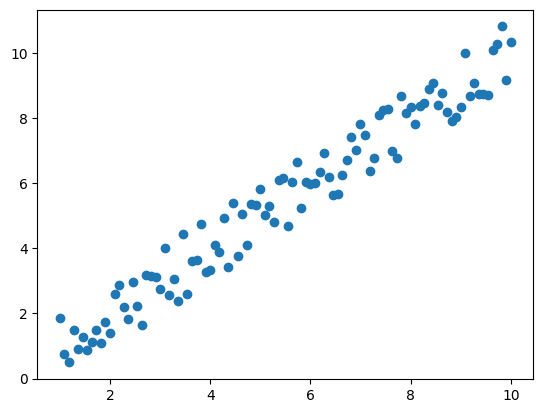

In [2]:
import random
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
%pylab inline

num_points = 100
m, b, delta = 1, 0, 1

x = np.linspace(1, 10, num_points)
y = m * x + b + random.uniform(-delta, delta, num_points)

plt.scatter(x,y)

### Обучим нашу линейную регрессию и посмотрим на результат

MSE: 0.37020397508781927


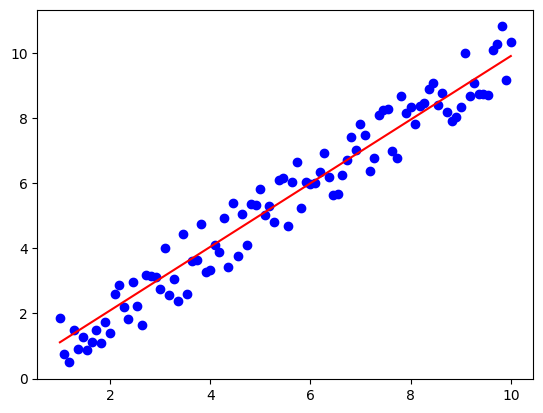

In [3]:
m, b, cost = linear_regression(x, y) # обучение

y_pred = m * x + b # предсказание

plt.scatter(x, y, color = 'blue')
plt.plot(x, y_pred, 'r-')

print('MSE: {}'.format(cost))

# Задание 1

Поэкспериментируйте с количеством шагов (epochs) и learning rate.
Как меняется итоговая ошибка при фиксированном числе шагов и различных learning rate?

1) Постройте графики для learning rate = 0.1, 0.01, 0.0001 и epochs = 10, 100, 1000 (всего 9 графиков).
Рядом с каждым графиком выведите ошибку (cost).

2) Прокомментируйте каждый график: ответьте на вопрос, почему вы видите именно такую прямую?

In [5]:
linear_regression(x, y, learning_rate = 0.1, epochs = 10) # обучение

(-151039760.9008988, -22479239.57883871, 2.0373460834234636e+16)

In [7]:
linear_regression(x, y, learning_rate = 0.0001, epochs = 10) # обучение

(0.07164363331632953, 0.010572490155001318, 32.61064170506791)

lr =  0.1
ep =  10


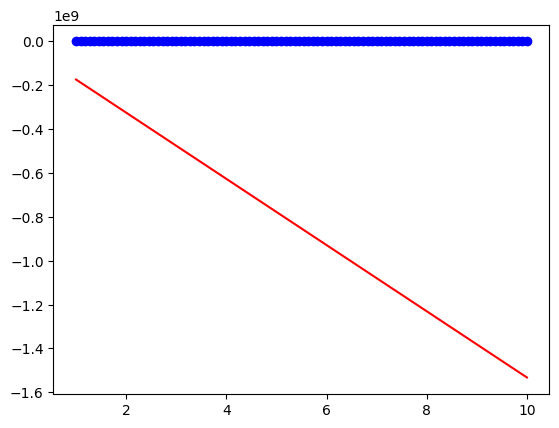

MSE: 2.0373460834234636e+16
lr =  0.1
ep =  100


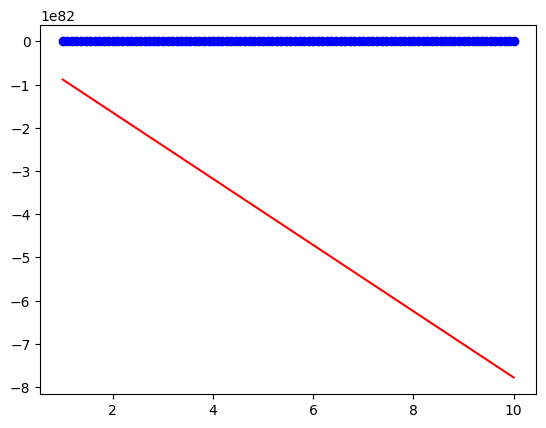

MSE: 5.2496569007027156e+163
lr =  0.1
ep =  1000


/var/folders/7t/_ywngh7s4vzflssy506tj1m40000gn/T/ipykernel_27838/726403300.py:5: RuntimeWarning: overflow encountered in scalar power
  cost = sum([err**2 for err in (y_pred - y_true)])*(1./N)
/var/folders/7t/_ywngh7s4vzflssy506tj1m40000gn/T/ipykernel_27838/726403300.py:8: RuntimeWarning: invalid value encountered in scalar subtract
  m = m - learning_rate * m_gradient


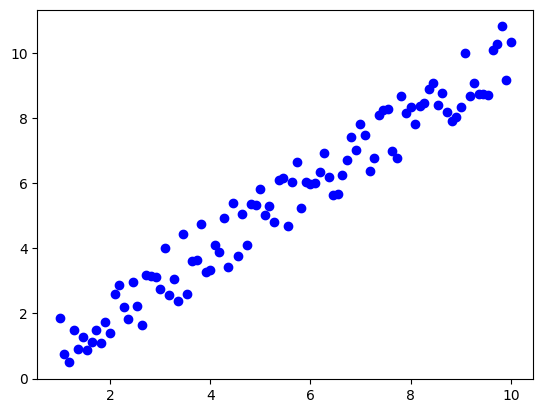

MSE: nan
lr =  0.01
ep =  10


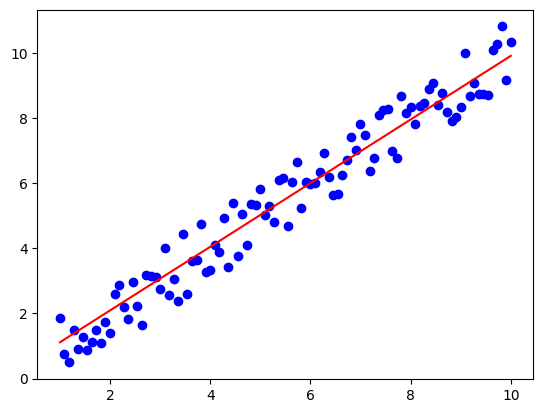

MSE: 0.37026735498906077
lr =  0.01
ep =  100


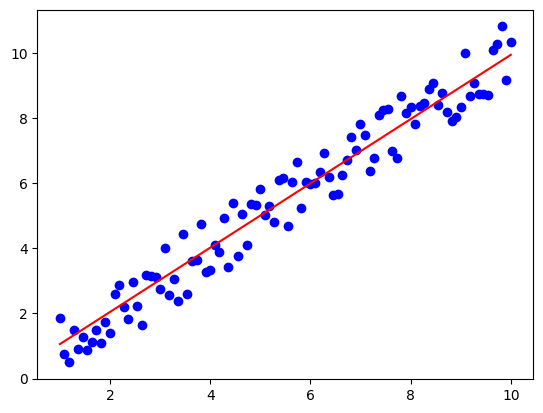

MSE: 0.3653293455522612
lr =  0.01
ep =  1000


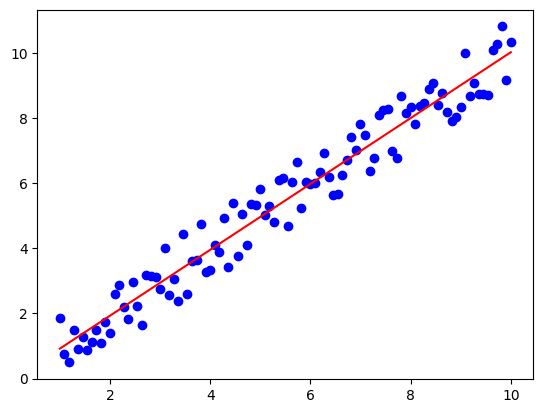

MSE: 0.3599923015101102
lr =  0.0001
ep =  10


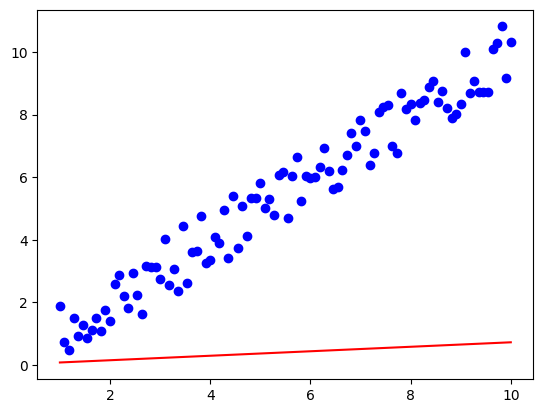

MSE: 32.61064170506791
lr =  0.0001
ep =  100


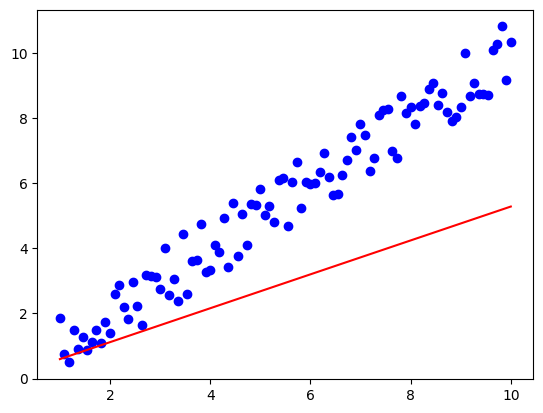

MSE: 8.550198183041877
lr =  0.0001
ep =  1000


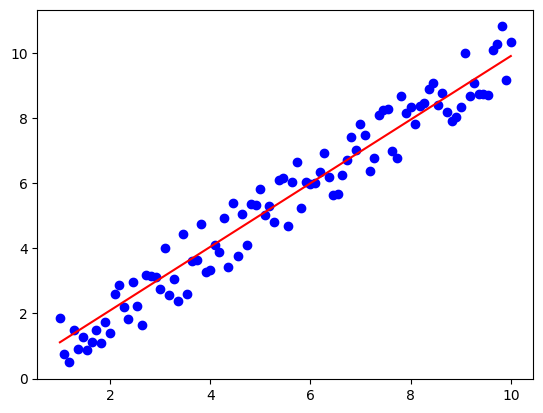

MSE: 0.37020397508781927


In [6]:
for lr in [0.1, 0.01, 0.0001]:
    for ep in [10, 100, 1000]:
        print('lr = ', lr)
        print('ep = ', ep)
        m, b, cost = linear_regression(x, y, learning_rate = lr, epochs = ep) # обучение
        y_pred = m * x + b # предсказание
        plt.scatter(x, y, color = 'blue')
        plt.plot(x, y_pred, 'r-')
        plt.show()
        print('MSE: {}'.format(cost))        

# Задание 2

Подумайте, как применить написанную функцию линейной регрессии для аппроксимации следующего набора точек. Решите эту задачу. Выведите на экран итоговое приближение (график) и ошибку.

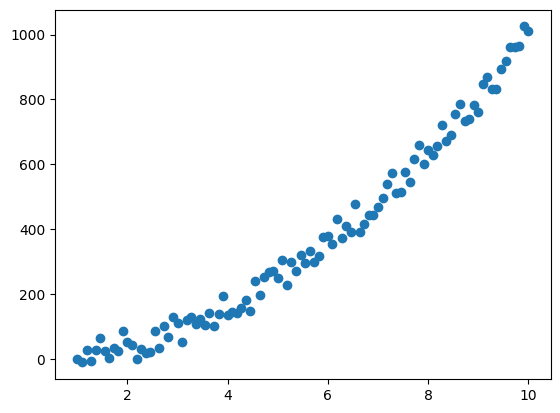

In [8]:
num_points = 100
m, b, delta = 10, 0, 50

x = np.linspace(1, 10, num_points)
y = m * x**2 + b + random.uniform(-delta, delta, num_points)

plt.scatter(x,y)

MSE: 801.5439905460256


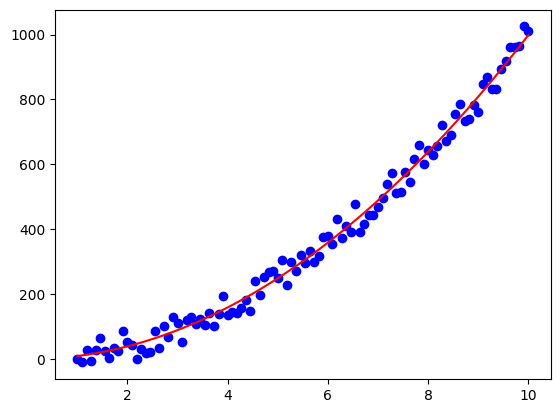

In [9]:
x2 = x ** 2

m, b, cost = linear_regression(x2, y) # обучение

y_pred = m * x2 + b # предсказание

plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, 'r-')

print('MSE: {}'.format(cost))

In [10]:
from sklearn.metrics import r2_score

r2_score(y, y_pred)

0.9909128738852936

# Задание 3

Считайте файл weights_heights.csv

In [11]:
df = pd.read_csv("weights_heights.csv")
df.head()

,Weight,Height
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


### Обучение и валидация модели.

Разобъем данные на обучающую и тестовую часть и обучим линейную регрессию на обучающей выборке (используйте функцию linear_regression для обучения)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Height'], df['Weight'], test_size = 0.2)

m, b, cost = linear_regression(X_train, y_train, learning_rate = 0.00001)

Сделаем предсказание на обучающей и тестовой выборках по формуле y = mx+b.

Вычислим RMSE на train и на test.

In [15]:
from sklearn.metrics import mean_squared_error

pred_train = m * X_train + b
pred_test = m * X_test + b

print("Train RMSE: {}".format(np.sqrt(mean_squared_error(y_train, pred_train))))
print("Test RMSE: {}".format(np.sqrt(mean_squared_error(y_test, pred_test))))

Train RMSE: 5.498137423383408
Test RMSE: 5.558507632719829


# Теперь проверим, как работает функция линейной регрессии из sklearn

In [16]:
X_train.head()

6676     123.5377
15248    126.2309
19039    128.8353
19910    137.5653
10786    150.5891
Name: Height, dtype: float64

In [17]:
from sklearn.linear_model import LinearRegression

X_train2, X_test2, y_train, y_test = train_test_split(df[['Height']], df['Weight'], test_size = 0.2)

lr = LinearRegression()
lr.fit(X_train2, y_train)

pred_train = lr.predict(X_train2)
pred_test = lr.predict(X_test2)

print("Train RMSE: {}".format(np.sqrt(mean_squared_error(y_train, pred_train))))
print("Test RMSE: {}".format(np.sqrt(mean_squared_error(y_test, pred_test))))

Train RMSE: 1.6380314923013373
Test RMSE: 1.6663337994689373


Посмотрим на качество линейной регрессии на кросс-валидации.

In [18]:
from sklearn.model_selection import cross_val_score

-cross_val_score(lr, df[['Height']], df['Weight'], cv = 5, scoring = 'neg_mean_squared_error').mean()

2.7028607259823416

In [19]:
lr.fit(df[['Height']], df['Weight'])

LinearRegression()